In [1]:
from matplotlib import pyplot
from wordcloud  import WordCloud

In [2]:
text = ""
with open("res/이상한나라의앨리스.txt", "r", encoding="utf-8") as f:
    text = f.read()

text

'\ufeffProject Gutenberg\'s Alice\'s Adventures in Wonderland, by Lewis Carroll\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.net\n\n\nTitle: Alice\'s Adventures in Wonderland\n       Illustrated by Arthur Rackham. With a Proem by Austin Dobson\n\nAuthor: Lewis Carroll\n\nIllustrator: Arthur Rackham\n\nRelease Date: May 19, 2009 [EBook #28885]\n\nLanguage: English\n\n\n*** START OF THIS PROJECT GUTENBERG EBOOK ALICE\'S ADVENTURES IN WONDERLAND ***\n\n\n\n\nProduced by Jana Srna, Emmy and the Online Distributed\nProofreading Team at http://www.pgdp.net (This file was\nproduced from images generously made available by the\nUniversity of Florida Digital Collections.)\n\n\n\n\n\n\n\n\n\n\n\nALICE\'S ADVENTURES IN WONDERLAND\n\n[Illustration: "Alice"]\n\n[Illustration:\n\n          ALICE\'

In [3]:
#WordCloud클래스의 객체 생성
wc = WordCloud(
                width=1200, #모니터 해상도 가로크기
                height=800, #모니터 해상도 세로크기
                scale=3.0   #보고서용, 인쇄용으로는 최소 2,3배는 크게해야 함
              )

In [4]:
#WordCloud 객체를 사용하여 텍스트에 대한 단어 빈도수 추출
#{'단어':빈도수, '단어':빈도수, ~~~ } 딕셔너리 형식
gen = wc.generate(text)
gen.words_

{'said': 1.0,
 'Alice': 0.7114285714285714,
 'said Alice': 0.3314285714285714,
 'little': 0.32,
 'one': 0.3,
 'know': 0.2571428571428571,
 'Project Gutenberg': 0.24857142857142858,
 'thing': 0.23714285714285716,
 'Queen': 0.2342857142857143,
 'went': 0.23142857142857143,
 'time': 0.2257142857142857,
 'see': 0.19714285714285715,
 'head': 0.18285714285714286,
 'well': 0.18285714285714286,
 'King': 0.18285714285714286,
 'now': 0.17714285714285713,
 'way': 0.17142857142857143,
 'Mock Turtle': 0.16857142857142857,
 'began': 0.16285714285714287,
 'Hatter': 0.16285714285714287,
 'Gutenberg tm': 0.16285714285714287,
 'Gryphon': 0.15714285714285714,
 'say': 0.15428571428571428,
 'much': 0.14857142857142858,
 'quite': 0.14857142857142858,
 'must': 0.14857142857142858,
 'first': 0.1457142857142857,
 'come': 0.1457142857142857,
 'go': 0.1457142857142857,
 'never': 0.14,
 'thought': 0.14,
 'think': 0.13714285714285715,
 'voice': 0.13428571428571429,
 'looked': 0.13428571428571429,
 'work': 0.131428

In [5]:
# 1) 금지어 설정 모듈 참조하기
from wordcloud import STOPWORDS

# 금지어 설정
# -> 금지어 : said, Alice, Gutenberg
# ->필요한 만큼 add()함수 호출해서 추가
ignore = set(STOPWORDS)
ignore.add("said")
ignore.add("Alice")
ignore.add("Gutenberg")

In [6]:
#WordCloud클래스의 객체 생성
wc = WordCloud(
                width=1200, 
                height=800, 
                scale=2.0,
                stopwords=ignore,  #금지어
                max_font_size=150, #최대 글자 크기
                max_words=100      #최대 표시 단어수
              )

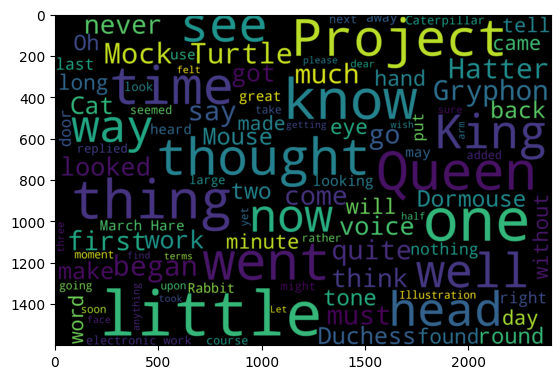

In [7]:
gen = wc.generate(text)
pyplot.figure()
pyplot.imshow(gen, interpolation="bilinear")
pyplot.show()  
pyplot.close()

In [8]:
# 2) Word Cloud 배경 이미지
import numpy as np
from PIL import Image #이미지 처리 모듈. 기본모듈이므로 따로 설치할 필요없음
"""----------------------------------------------------------------------------------------
   이미지 분석 및 처리를 쉽게 할 수 있는 라이브러리(Python Imaging Library : PIL)
   아래 소스에서 에러가 발생이 되면 Pillow모듈 삭제후 다시 설치
   >pip uninstall Pillow
   >pip install Pillow
-------------------------------------------------------------------------------------------"""

'----------------------------------------------------------------------------------------\n   이미지 분석 및 처리를 쉽게 할 수 있는 라이브러리(Python Imaging Library : PIL)\n   아래 소스에서 에러가 발생이 되면 Pillow모듈 삭제후 다시 설치\n   >pip uninstall Pillow\n   >pip install Pillow\n-------------------------------------------------------------------------------------------'

In [9]:
# 배경 이미지 가져오기
img = Image.open("res/앨리스배경.png")
img_array = np.array(img) # 배경 이미지 데이터를 numpy 배열로 변환
#type(img_array)

numpy.ndarray

In [14]:
# WordCloud클래스의 객체 생성
wc = WordCloud(
                width=1200, 
                height=800, 
                scale=2.0,
                stopwords=ignore,  #금지어
                max_font_size=150, #최대 글자 크기
                max_words=100,     #최대 표시 단어수
                mask=img_array,    #배경 이미지
                background_color="#ffffff" #배경색
              )

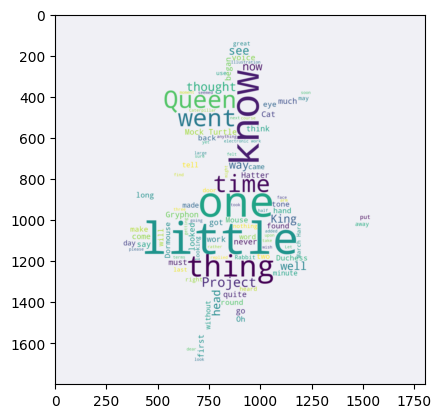

In [15]:
gen = wc.generate(text)
pyplot.figure()
pyplot.imshow(gen, interpolation="bilinear")
pyplot.show()  
pyplot.close()